In [14]:
!wget -nd ftp://ftp.1000genomes.ebi.ac.uk/vol1/ftp/phase3/data/NA18489/sequence_read/SRR003265.filt.fastq.gz

--2021-01-04 15:37:53--  ftp://ftp.1000genomes.ebi.ac.uk/vol1/ftp/phase3/data/NA18489/sequence_read/SRR003265.filt.fastq.gz
           => ‘SRR003265.filt.fastq.gz.1’
Resolving ftp.1000genomes.ebi.ac.uk (ftp.1000genomes.ebi.ac.uk)... 193.62.197.77
Connecting to ftp.1000genomes.ebi.ac.uk (ftp.1000genomes.ebi.ac.uk)|193.62.197.77|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /vol1/ftp/phase3/data/NA18489/sequence_read ... done.
==> SIZE SRR003265.filt.fastq.gz ... 28919712
==> PASV ... 
Cannot initiate PASV transfer.


In [1]:
import gzip
from Bio import SeqIO
hdl = gzip.open('SRR003265.filt.fastq.gz', 'rt', encoding='utf-8')
recs = SeqIO.parse(hdl, 'fastq')
rec = next(recs)
print(rec.id, rec.description, rec.seq)
print(rec.letter_annotations)



SRR003265.31 SRR003265.31 3042NAAXX:3:1:1252:1819 length=51 GGGAAAAGAAAAACAAACAAACAAAAACAAAACACAGAAACAAAAAAACCA
{'phred_quality': [40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 30, 23, 40, 32, 35, 29, 40, 16, 40, 40, 32, 35, 31, 40, 40, 39, 22, 40, 24, 20, 28, 31, 12, 31, 10, 22, 28, 13, 26, 20, 23, 23]}


* Tip: It is best to store your fastq files in a zipfile becasue it takes up alot of disc space otherwise
* also never do this with fastq file
- `recs = list(recs) # do not do it!`

this takes up to much disk space and may crash your program

instead only iterate through it

Default dict is the same as a notmal dict but the diffrence is that default dict never has a key error instead it just has the value as missing

In [2]:
from collections import defaultdict
count = defaultdict(int)
for rec in recs:
    for letter in rec.seq:
        count[letter] += 1

total = sum(count.values())
count

defaultdict(int,
            {'G': 5359329,
             'A': 7411928,
             'T': 7666885,
             'C': 5444044,
             'N': 37289})

In [3]:
#used to calculate the percent of theeach letter in the fastQ Sequence
for letter, count in count.items():
    print(f'{letter}: {100.*count / total} {count}')

G: 20.676842412896093 5359329
A: 28.59598043556052 7411928
T: 29.5796307602681 7666885
C: 21.003681594631065 5444044
N: 0.14386479664422216 37289


Another advantage of default dict is that you do not have to initialize the values inside of the dict

<hr>
we have a minimal amount of N base which means there is an unknown nucelotide present

Now lets plot the number of N values in respect to its postion or index

In [4]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Position vs N Calls')

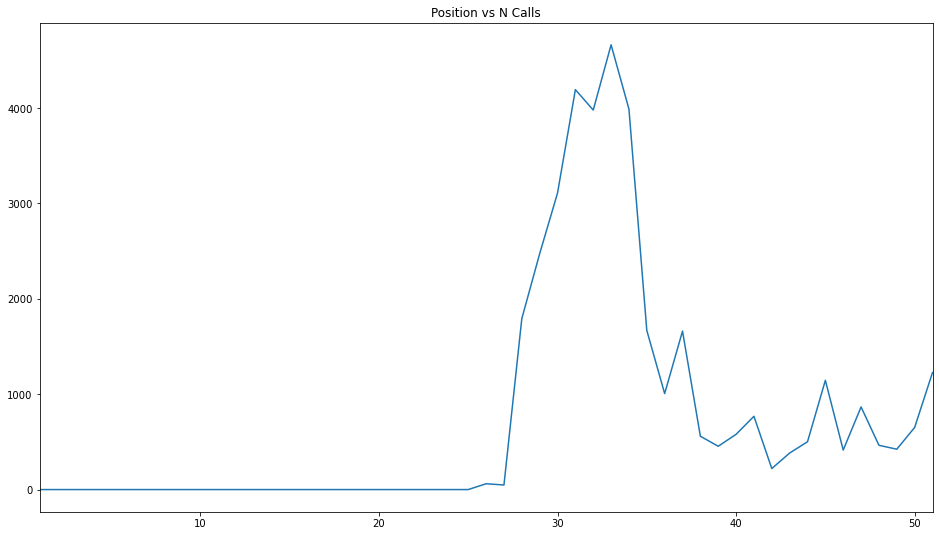

In [5]:
recs = SeqIO.parse(gzip.open('SRR003265.filt.fastq.gz', 'rt', encoding='utf-8'), 'fastq')
nCount = defaultdict(int)
for rec in recs:
    for i, letter in enumerate(rec.seq): #enumerate i
        pos = i + 1 #start with zero
        if letter == 'N':
            nCount[pos] += 1
seq_len = max(nCount.keys())
positions = range(1, seq_len + 1)
fig, ax = plt.subplots(figsize=(16,9))
ax.plot(positions, [nCount[x] for x in positions])
ax.set_xlim(1, seq_len)
ax.set_title('Position vs N Calls')




What we can analyze from this graph is that there are no N calls before the 25th postion. This means that the number of N calls are postion dependent.

In [6]:
recs = SeqIO.parse(gzip.open('SRR003265.filt.fastq.gz', 'rt', encoding='utf-8'), 'fastq')
cnt_qual = defaultdict(int)
for rec in recs:
    for i, qual in enumerate(rec.letter_annotations['phred_quality']):
        if i < 25:
            continue
        cnt_qual[qual] += 1
tot = sum(cnt_qual.values())
for qual, cnt in cnt_qual.items():
    print('%d: %.2f %d' % (qual, 100. * cnt / tot, cnt))

40: 22.76 3007221
16: 2.05 270431
32: 1.03 136763
35: 0.91 120704
31: 1.08 142464
39: 0.78 102568
22: 1.59 209905
24: 1.46 193259
20: 1.73 228923
28: 1.23 162226
12: 2.35 309918
10: 4.95 654154
13: 2.28 301033
26: 1.33 176263
23: 1.52 201164
37: 0.84 111179
34: 0.95 125624
21: 1.66 219602
30: 1.13 149449
33: 0.99 131291
25: 1.40 184846
17: 1.97 259779
38: 0.80 106290
4: 4.77 630923
36: 0.88 115701
18: 1.88 248982
11: 2.41 318303
19: 1.81 239621
5: 4.88 645266
9: 2.51 332259
3: 4.04 533458
27: 1.28 168902
8: 2.53 334410
29: 1.17 154892
15: 2.12 280719
7: 2.51 331743
2: 3.77 498679
14: 2.20 291341
6: 2.50 330834
1: 1.52 200558
0: 0.40 52229


[Text(0, 0, '26'),
 Text(1, 0, '27'),
 Text(2, 0, '28'),
 Text(3, 0, '29'),
 Text(4, 0, '30'),
 Text(5, 0, '31'),
 Text(6, 0, '32'),
 Text(7, 0, '33'),
 Text(8, 0, '34'),
 Text(9, 0, '35'),
 Text(10, 0, '36'),
 Text(11, 0, '37'),
 Text(12, 0, '38'),
 Text(13, 0, '39'),
 Text(14, 0, '40'),
 Text(15, 0, '41'),
 Text(16, 0, '42'),
 Text(17, 0, '43'),
 Text(18, 0, '44'),
 Text(19, 0, '45'),
 Text(20, 0, '46'),
 Text(21, 0, '47'),
 Text(22, 0, '48'),
 Text(23, 0, '49'),
 Text(24, 0, '50'),
 Text(25, 0, '51')]

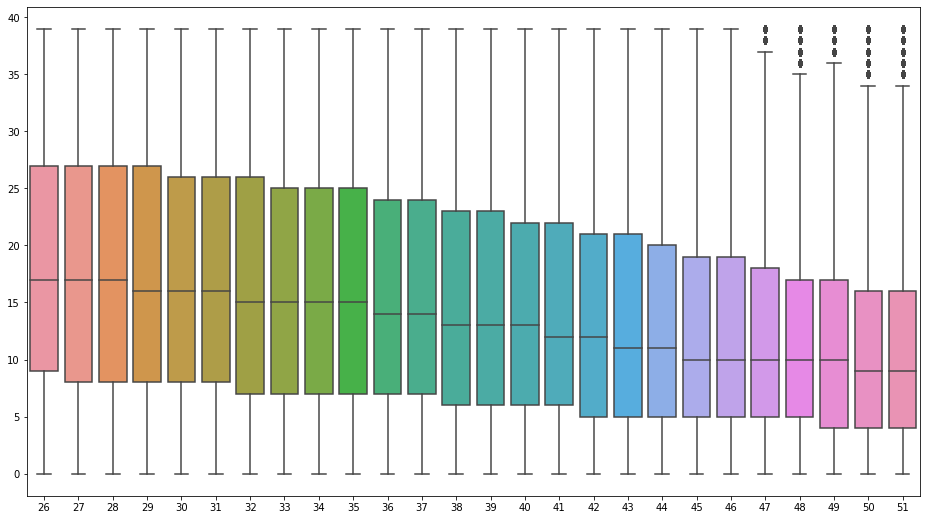

In [9]:
recs = SeqIO.parse(gzip.open('SRR003265.filt.fastq.gz', 'rt', encoding='utf-8'), 'fastq')
qual_pos = defaultdict(list)
for rec in recs:
    for i, qual in enumerate(rec.letter_annotations['phred_quality']):
        if i < 25 or qual == 40:
           continue
        pos = i + 1
        qual_pos[pos].append(qual)
vps = []
poses = list(qual_pos.keys())
poses.sort()
for pos in poses:
    vps.append(qual_pos[pos])
fig, ax = plt.subplots(figsize=(16,9))
sns.boxplot(data=vps, ax=ax)
ax.set_xticklabels([str(x) for x in range(26, max(qual_pos.keys()) + 1)])